In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vindr-cxr-process5/Process 5/e8a33efad92e29059710804688d915bc.png
/kaggle/input/vindr-cxr-process5/Process 5/67d2aa041a3556a12994b0ba36fbdc68.png
/kaggle/input/vindr-cxr-process5/Process 5/ac84f263701e0d8668a47ac3e59e4e48.png
/kaggle/input/vindr-cxr-process5/Process 5/f3adcfd01d642fb478c008211b135c12.png
/kaggle/input/vindr-cxr-process5/Process 5/690a74b4ebf969fbadc5ad0a1187968d.png
/kaggle/input/vindr-cxr-process5/Process 5/088006f2453c4183b1ef46fb607bc31c.png
/kaggle/input/vindr-cxr-process5/Process 5/f4d7a04f379295bb190b0c95567f7e0a.png
/kaggle/input/vindr-cxr-process5/Process 5/39f4a6340e828c92acc219f9dad010ef.png
/kaggle/input/vindr-cxr-process5/Process 5/7ef33b98e713d60a55e8d7003abdad14.png
/kaggle/input/vindr-cxr-process5/Process 5/d997f71818df03dd9ba8d4214dcf1856.png
/kaggle/input/vindr-cxr-process5/Process 5/a1d364ae6d436a86d729725bae53c0a1.png
/kaggle/input/vindr-cxr-process5/Process 5/39007c37983c809a94d91a3718563356.png
/kaggle/input/vindr-cxr-process5/Process

In [32]:
# PREPROCESSING NOTEBOOK
import os, shutil
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [27]:
# Paths
INPUT_DIR = '/kaggle/input/vindr-cxr-process5/Process 5'
WORK_DIR = '/kaggle/working/vindr_project'
SAMPLE_DIR = os.path.join(WORK_DIR, 'sample_images')
RESIZED_DIR = os.path.join(WORK_DIR, 'resized_images')

os.makedirs(WORK_DIR, exist_ok=True)
os.makedirs(SAMPLE_DIR, exist_ok=True)
os.makedirs(RESIZED_DIR, exist_ok=True)

In [28]:
# List images
files = sorted([f for f in os.listdir(INPUT_DIR) if f.lower().endswith(('.png','.jpg','.jpeg'))])
print('Total images found:', len(files))
print('First 10 files:', files[:10])

Total images found: 15000
First 10 files: ['000434271f63a053c4128a0ba6352c7f.png', '00053190460d56c53cc3e57321387478.png', '0005e8e3701dfb1dd93d53e2ff537b6e.png', '0006e0a85696f6bb578e84fafa9a5607.png', '0007d316f756b3fa0baea2ff514ce945.png', '000ae00eb3942d27e0b97903dd563a6e.png', '000d68e42b71d3eac10ccc077aba07c1.png', '00150343289f317a0ad5629d5b7d9ef9.png', '00176f7e1b1cb835123f95960b9a9efd.png', '001d127bad87592efe45a5c7678f8b8d.png']


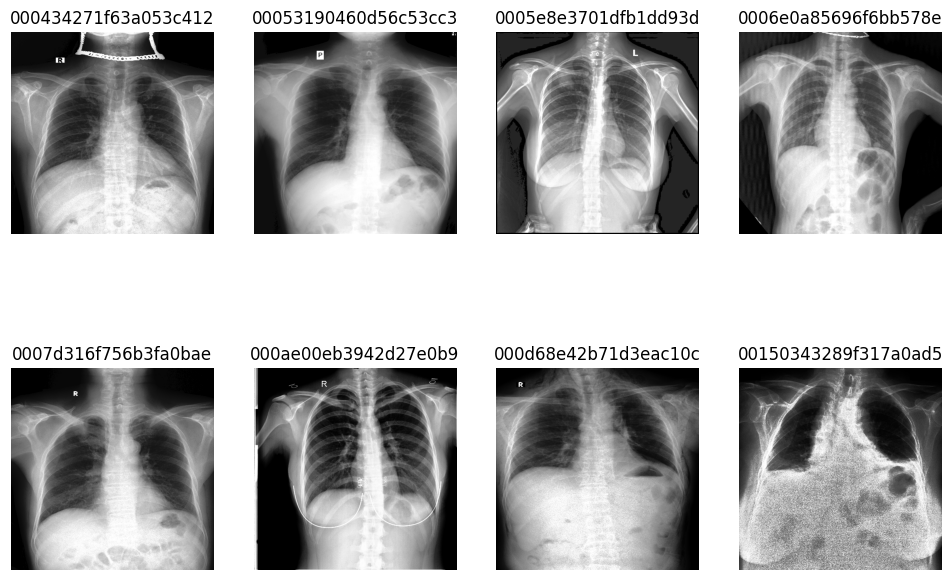

In [29]:
# Display a few images
def show_grid(names, cols=4, size=(12,8)):
    plt.figure(figsize=size)
    for i, n in enumerate(names):
        p = os.path.join(INPUT_DIR, n)
        img = cv2.imread(p, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        plt.subplot((len(names)+cols-1)//cols, cols, i+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(n[:20])
    plt.show()


show_grid(files[:8])

In [30]:
# Quick stats: image sizes
sizes = {}
for f in files:
    p = os.path.join(INPUT_DIR, f)
    img = cv2.imread(p)
    if img is None:
        sizes['corrupt'] = sizes.get('corrupt', 0) + 1
        continue
    h, w = img.shape[:2]
    sizes[(w, h)] = sizes.get((w, h), 0) + 1


print('Unique sizes count:', len(sizes))

from collections import Counter
cnt = Counter(sizes)
print('Top sizes:', cnt.most_common(5))

Unique sizes count: 1
Top sizes: [((512, 512), 15000)]


In [33]:
# Create a small sample for quick debugging (first 200 images)
sample_files = files[:200]
for fname in sample_files:
    shutil.copy(os.path.join(INPUT_DIR, fname), os.path.join(SAMPLE_DIR, fname))
print('Sample copied to', SAMPLE_DIR)

Sample copied to /kaggle/working/vindr_project/sample_images


In [34]:
# Create resized copies (maintain aspect ratio; pad)
TARGET = 640
print('Resized images will be saved to', RESIZED_DIR)

Resized images will be saved to /kaggle/working/vindr_project/resized_images
